Gabriel Riegner: 06 DEC 2024

---

**HW3 P4**:

$X \sim$ Multivariate Gaussian with five different settings of $n,d,s$.

Show the following MSE upper bound is valid:

$\frac{1}{n} ||X \hat\theta (\lambda) - X \theta^* ||_2^{2} \le 32 \lambda^2 s$

where $\lambda \approx \frac{s\cdot\text{log}(d)}{n}$.

Assume:
1. $Y=X\theta^* + \epsilon$
2. column normalization
3. $||\theta^*||_0 \le s$, where $s<<n$ (sparsity assumption)
4. $X\in \mathbb{R}^{n \times d}$ needs to satisfy incoherence condition (s) or "sparsity"

Lasso estimator:

$\hat\theta(\lambda) = \text{argmin}_{\theta\in\mathbb{R}^d} \{\frac{1}{n} ||Y-X\theta||_2^2 + 2\lambda ||\theta||_1\}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# setting
ns = np.arange(1000, 5001, 1000)
ss = [20, 30, 40, 50, 60]  # s << n

rng = np.random.default_rng(0)
results = {f"s={s}": {"mse": [], "upper_bound": []} for s in ss}

for s in ss:
    for n in ns:
        d = n  # d = n
        lambda_ = (s * np.log(d)) / n

        # X
        X = rng.standard_normal((n, d))
        X /= np.linalg.norm(X, axis=0)  # column normalization

        # sparse theta*
        theta_star = np.zeros(d)
        nonzeros = rng.choice(d, s, replace=False)
        theta_star[nonzeros] = rng.standard_normal(s)

        # y
        y = X @ theta_star + rng.standard_normal(n)

        # lasso regression
        lasso = Lasso(alpha=2 * lambda_ / n, fit_intercept=False)
        lasso.fit(X, y)
        theta_hat = lasso.coef_

        # empirical MSE
        mse_ = (1 / n) * np.linalg.norm(X @ theta_hat - X @ theta_star) ** 2

        # theoretical upper bound
        upper_bound = 32 * (lambda_**2) * s

        # store results
        results[f"s={s}"]["mse"].append(mse_)
        results[f"s={s}"]["upper_bound"].append(upper_bound)

Text(0.5, 0, 'n = d')

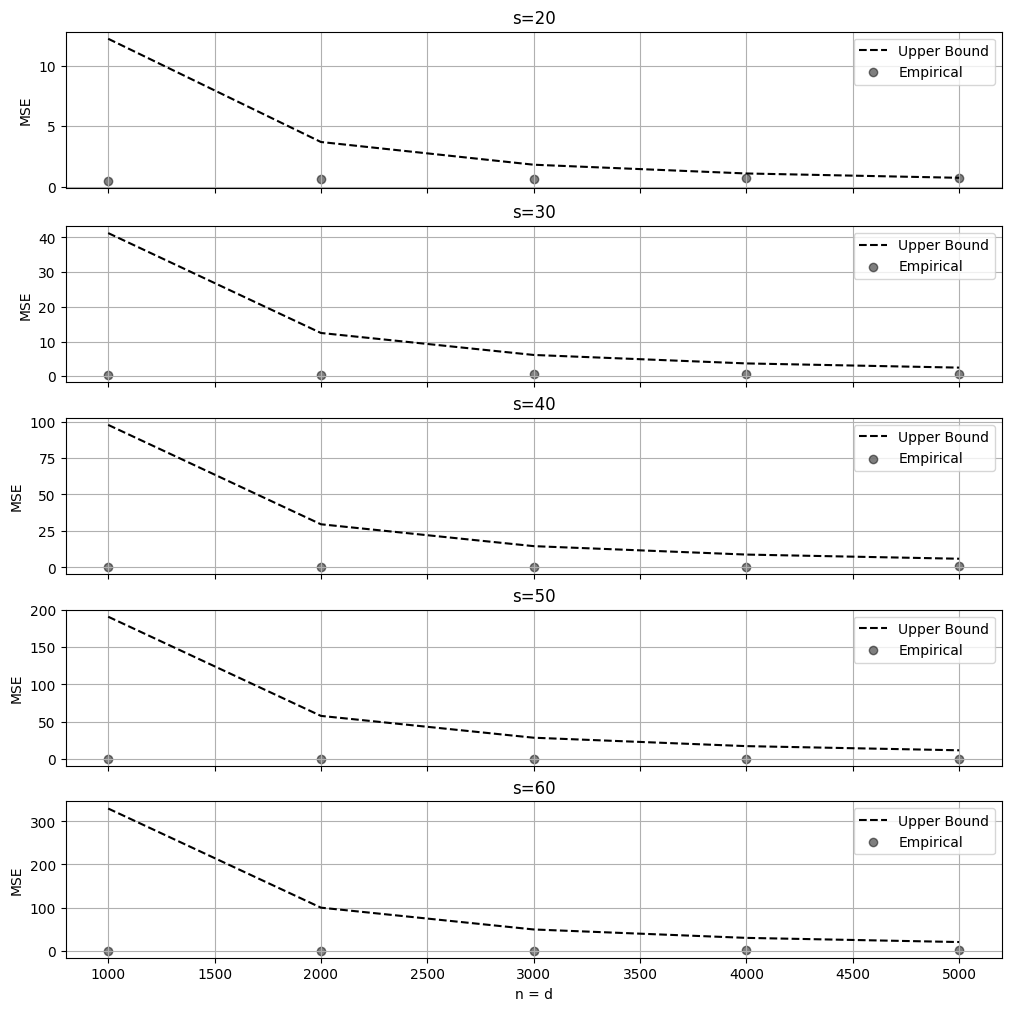

In [2]:
# plot results
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True, layout="constrained")

for ax, (label, values) in zip(axs, results.items()):
    ax.plot(ns, values["upper_bound"], c="k", linestyle="--", label="Upper Bound")
    ax.scatter(ns, values["mse"], c="k", alpha=0.5, label="Empirical")
    ax.set_ylabel("MSE")
    ax.set_title(label)
    ax.legend()
    ax.grid(True)

axs[-1].set_xlabel("n = d")